## Items to add in the code
- adding the 
- adding a function to split the data in: training, validation, test set
- adding ANOVA test to check the significance of the features
- adding validation functions, like Classifier Tuning (Hyperparameter Tuning: **grid search** or random search)
- adding models: KNN, Decision Tree, Random Forest, Gradient Boosting, cross-validation
- adding performance metrics for the models (overfitting, underfitting, learning curve)
- adding EDA to visualize the data
- Interpretation of Summary Statistics for the leep productivity Dataset

## actions
- prepare PPT (problem statement, objective, plan, status)
- defining the research and sub questions
- split tasks



C:\Users\gijeg\AppData\Local\Temp\ipykernel_10512\832347306.py:28: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df['Date'] = df['Date'].view('int64') / 1e9 # Omzetten van datetime naar float (Unix timestamp in seconden)


Mean Squared Error: 8.236177109976984


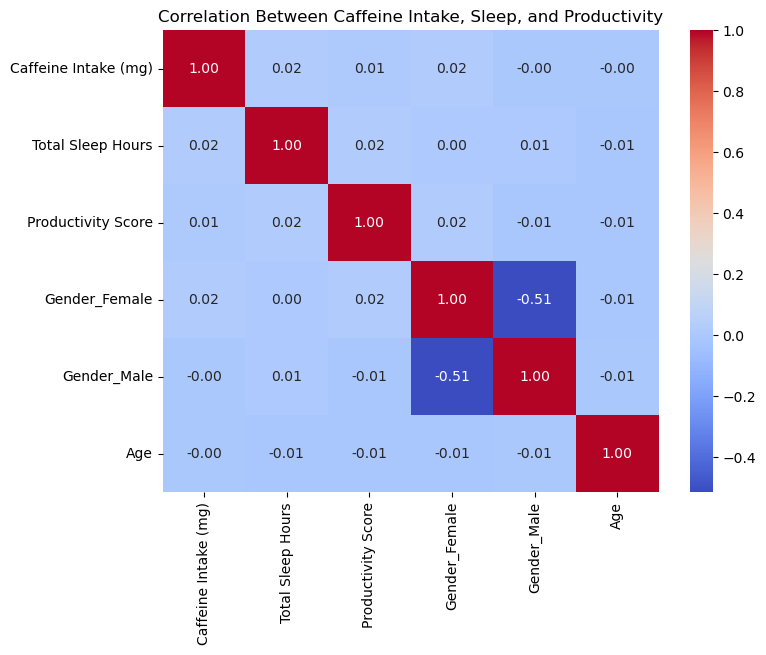

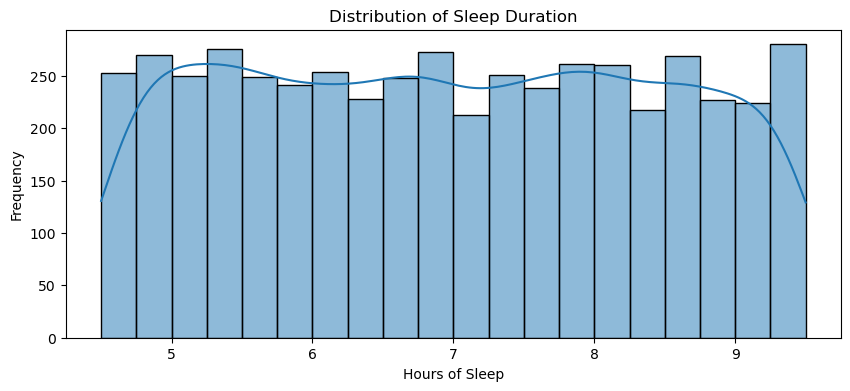

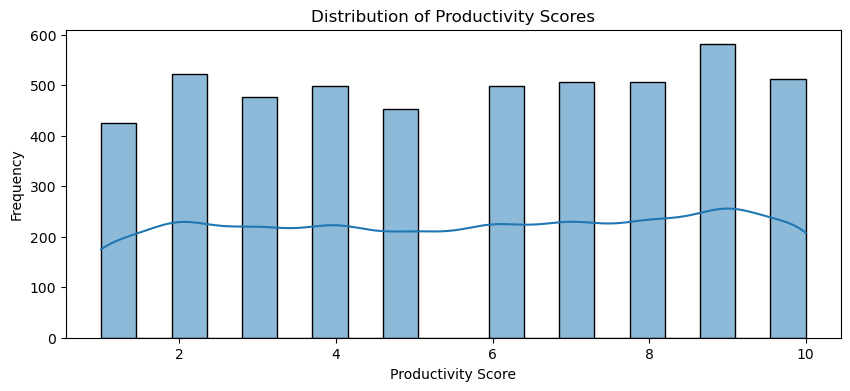

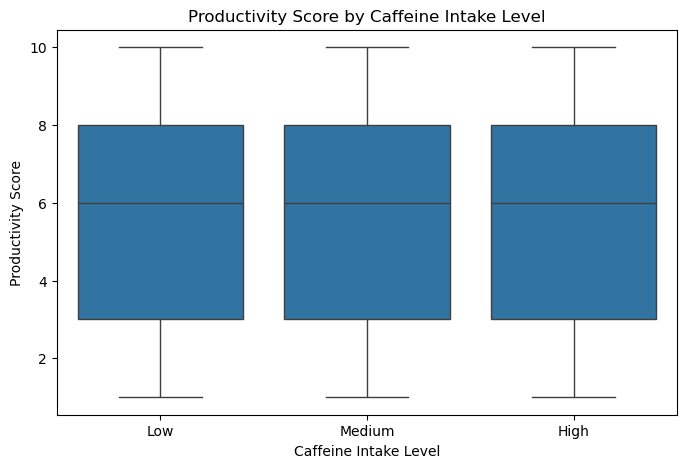

               Date    Person_ID          Age  Sleep Start Time  \
count  4.982000e+03  4982.000000  4982.000000       4982.000000   
mean   1.720055e+09  5532.329587    38.585508         22.006259   
std    9.065802e+06  2596.093588    12.297875          1.157059   
min    1.704067e+09  1000.000000    18.000000         20.000000   
25%    1.712362e+09  3261.000000    28.000000         21.030000   
50%    1.720138e+09  5612.000000    39.000000         22.020000   
75%    1.728065e+09  7763.000000    49.000000         23.000000   
max    1.735603e+09  9998.000000    59.000000         23.980000   

       Sleep End Time  Total Sleep Hours  Sleep Quality  Exercise (mins/day)  \
count     4982.000000        4982.000000    4982.000000          4982.000000   
mean         4.980919           6.974645       5.521477            43.941991   
std          1.862745           1.455321       2.863109            25.807685   
min          0.560000           4.500000       1.000000             0.000000

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# dataset
localdir = 'data/sleep_productivity.csv'

def preprocess_data(CSV_file):
    # Load dataset
    df = pd.read_csv(CSV_file)

    # Data Cleaning & Handling missing values
    df.replace("unknown", np.nan, inplace=True)
    df.dropna(subset=["Total Sleep Hours"], inplace=True)
    df["Caffeine Intake (mg)"] = df["Caffeine Intake (mg)"].replace(-999, np.nan)

    # Convert Deep Sleep to numeric
    # df["Deep Sleep (%)"] = pd.to_numeric(df["Deep Sleep (%)"], errors='coerce')

    # convert data strings to numeric
    df['Date'] = pd.to_datetime(df['Date']) # Omzetten van string naar datetime
    df['Date'] = df['Date'].view('int64') / 1e9 # Omzetten van datetime naar float (Unix timestamp in seconden)

    # One-hot encoding of categorical variables
    df = pd.get_dummies(df, dtype =int)

    # Add Caffeine Intake Category
    df["Caffeine Intake Category"] = pd.cut(df["Caffeine Intake (mg)"], bins=[0, 50, 150, 300], labels=["Low", "Medium", "High"])

    # Drop remaining rows with missing values    
    df = df.dropna()



    return df

def create_features(df):
    # Feature Engineering
    # df["Light Sleep (%)"] = df["Sleep Duration (hours)"] - df["Deep Sleep (%)"]
    # df["Total Sleep (%)"] = df["Deep Sleep (%)"] + df["Light Sleep (%)"]
    # df["Sleep Efficiency"] = df["Total Sleep Hours"] / df["Sleep Duration (hours)"]
    df["Caffeine per Hour"] = df["Caffeine Intake (mg)"] / df["Total Sleep Hours"]
    
    return df

def train_model(df, target="Productivity Score"):
    # drop the values that are not needed in the model 
    X = df.drop(columns=[target, "Caffeine Intake Category"])
    
    # Train-test split
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    return model

def evaluate_model(model, df):
    # drop the values that are not needed in the model 
    X = df.drop(columns=["Productivity Score", "Caffeine Intake Category"])

    # Evaluate the model and verify the mean squared error for the prediction (y_pred)
    y = df["Productivity Score"]
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    print(f"Mean Squared Error: {mse}")

def visualize_correlations(df):
    # Correlation analysis
    correlation_matrix = df[["Caffeine Intake (mg)", "Total Sleep Hours", "Productivity Score", "Gender_Female", "Gender_Male", "Age"]].corr()

    # Heatmap visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Between Caffeine Intake, Sleep, and Productivity")
    plt.show()

    # Distribution plots
    plt.figure(figsize=(10, 4))
    sns.histplot(df["Total Sleep Hours"], bins=20, kde=True)
    plt.title("Distribution of Sleep Duration")
    plt.xlabel("Hours of Sleep")
    plt.ylabel("Frequency")
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.histplot(df["Productivity Score"], bins=20, kde=True)
    plt.title("Distribution of Productivity Scores")
    plt.xlabel("Productivity Score")
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot of productivity across caffeine intake levels
    df["Caffeine Intake Category"] = pd.cut(df["Caffeine Intake (mg)"], bins=[0, 50, 150, 300], labels=["Low", "Medium", "High"])
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Caffeine Intake Category", y="Productivity Score", data=df)
    plt.title("Productivity Score by Caffeine Intake Level")
    plt.xlabel("Caffeine Intake Level")
    plt.ylabel("Productivity Score")
    plt.show()

    # Summary statistics
    print(df.describe())

# load and clean data
df = preprocess_data(localdir)

# # Feature Engineering
df = create_features(df)

# Train ML models
model = train_model(df)

# Evaluate and visualize results
evaluate_model(model, df)
visualize_correlations(df)